## Initialize RGCPD class
args:
- list_of_name_path
- start_end_TVdate

        list_of_name_path : list of name, path tuples. 
        Convention: first entry should be (name, path) of target variable (TV).
        list_of_name_path = [('TVname', 'TVpath'), ('prec_name1', 'prec_path1')]
        
        TV period : tuple of start- and enddate in format ('mm-dd', 'mm-dd')

In [5]:
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
rg = RGCPD()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing with test data


Post-process input data 
args:
- loadleap=False
- seldates=None 
- selbox=None,
- format_lon='east_west',
- detrend=True
- anomaly=True

In [6]:
rg.pp_precursors()

Loaded post-processed data of sst_test



### Post-processing Target Variable

In [7]:
rg.pp_TV()

original tfreq of imported response variable is converted to desired tfreq
Detrending Respone Variable.
Performing 3 day rolling mean with gaussian window (std=1.5) to get better interannual statistics
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years


In [154]:
rg.traintest?

Signature:
rg.traintest(
    method='no_train_test_split',
    seed=1,
    kwrgs_events=None,
    precursor_ts=None,
)
Docstring:
Splits the training and test dates, either via cross-validation or
via a simple single split.
agrs:
'method'        : str referring to method to split train test, see
                  options for method below.
seed            : the seed to draw random samples for train test split
kwrgs_events    : dict needed to create binary event timeseries, which
                  is used to create stratified folds.
                  See func_fc.Ev_timeseries? for more info.
precursor_ts    : Load in precursor 1-d timeseries in format:
                  [(name1, path_to_h5_file1), [(name2, path_to_h5_file2)]]
                  precursor_ts should follow the RGCPD traintest format
Options for method:
(1) random{int}   :   with the int(ex['method'][6:8]) determining the amount of folds
(2) ran_strat{int}:   random stratified folds, stratified based upon events,
           

In [165]:
rg.traintest(method='ran_strat5')

kwrgs_events not given, creating stratified traintest split based on events defined as exceeding the 66th percentile


In [166]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100.0%, trainsize=(256dp, 80%)



In [167]:
rg.cluster_regions(distance_eps=500)

Plotting Corr maps sst_test_labels_init, split 4, lag 10



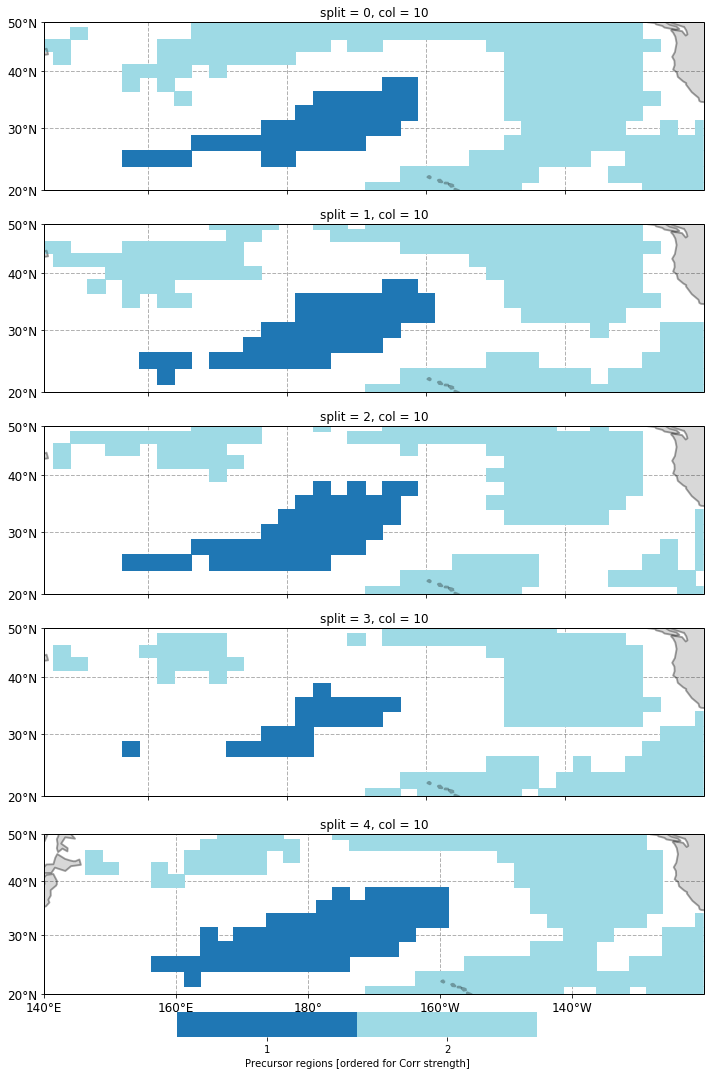

In [168]:
rg.quick_view_labels() 

In [169]:
rg.get_ts_prec()

There are [2, 2, 2, 2, 2] regions for sst_test (list of different splits)


In [170]:
rg.df_data

t2m_eUS  1..1..sst_test  1..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949        0.163849        0.172670         True    False
  1979-01-21  5.202951        0.581208       -0.058598         True    False
  1979-01-31  1.976927        0.284721       -0.068124         True    False
  1979-02-10  0.300682        0.549779       -0.168974         True    False
  1979-02-20  3.358494        1.164752       -0.183177         True    False
...                ...             ...             ...          ...      ...
4 2018-11-17  1.427837       -0.433954        0.789130         True    False
  2018-11-27  4.672652       -0.265863        0.793418         True    False
  2018-12-07  1.403350       -0.331784        0.652629         True    False
  2018-12-17  6.580028       -0.180878        0.486528         True    False
  2018-12-27  6.242537       -0.108917        0.356166         True    False

[7200 rows x 5 columns]

In [171]:
rg.PCMCI_df_data()

Progress causal inference - traintest set 100.0%

















Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_test_labels, split 0, lag sst_test_labels_tigr



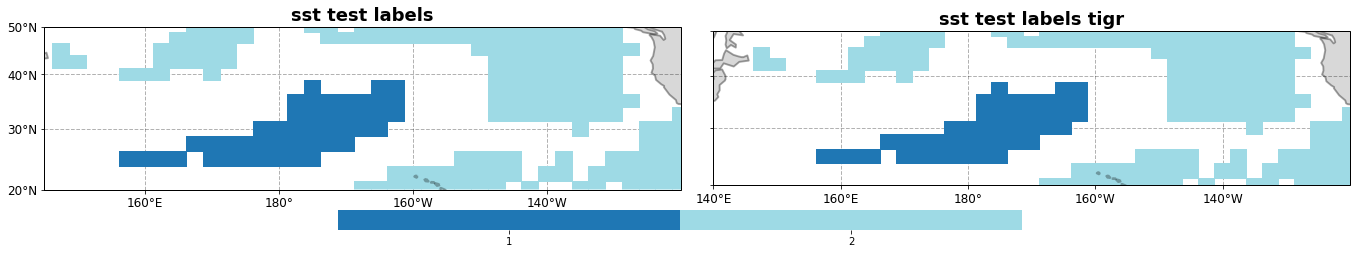

Plotting Corr maps sst_test_labels, split 0, lag robustness sst_test causal



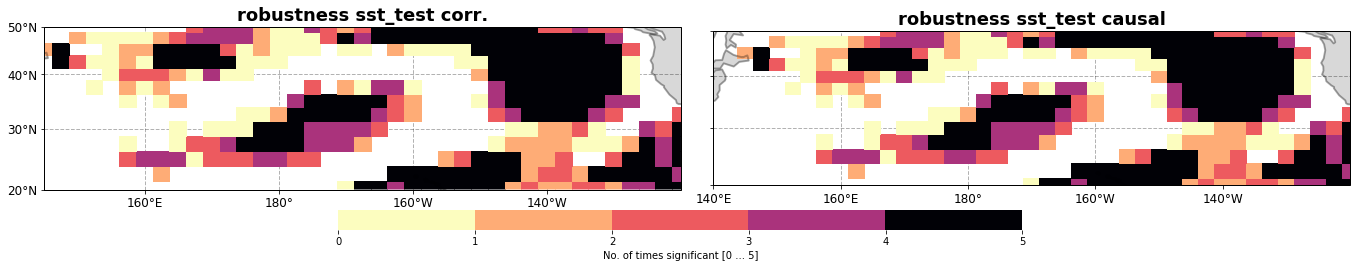


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_test_corr_tigr



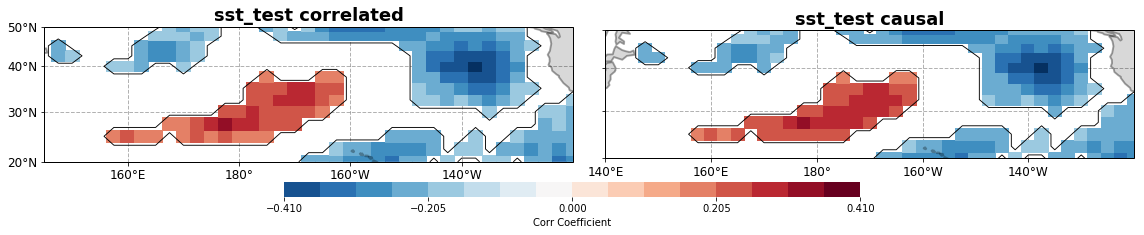

In [172]:
rg.plot_maps_sum()

In [173]:
rg.df_data

t2m_eUS  1..1..sst_test  1..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949        0.163849        0.172670         True    False
  1979-01-21  5.202951        0.581208       -0.058598         True    False
  1979-01-31  1.976927        0.284721       -0.068124         True    False
  1979-02-10  0.300682        0.549779       -0.168974         True    False
  1979-02-20  3.358494        1.164752       -0.183177         True    False
...                ...             ...             ...          ...      ...
4 2018-11-17  1.427837       -0.433954        0.789130         True    False
  2018-11-27  4.672652       -0.265863        0.793418         True    False
  2018-12-07  1.403350       -0.331784        0.652629         True    False
  2018-12-17  6.580028       -0.180878        0.486528         True    False
  2018-12-27  6.242537       -0.108917        0.356166         True    False

[7200 rows x 5 columns]

In [174]:
rg.df_sum

lag_corr  region_number       var  causal  lag_tig
0 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0
1 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0
2 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0
3 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0
4 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0